# 全英語授課(EMI)教學回饋調查問卷-作業系統 - 期末

In [ ]:
import pandas as pd
# read dataset
final_df = pd.read_csv("C:/Users/lutin/OneDrive/文件/教育研究論文中統計應用之AI分類的場景初探/EMI_data/111學年度台北市立大學資訊科學系全英語授課(EMI)教學回饋調查問卷-作業系統-期末.csv",encoding='utf-8-sig')
# NAN fill 0
final_df.fillna(0, inplace=True)
final_df['3. I got good grades in my class last semester.'] = final_df['3. I got good grades in my class last semester.'].astype(int)
final_df

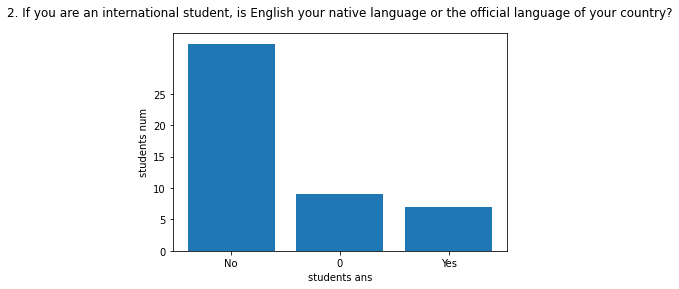

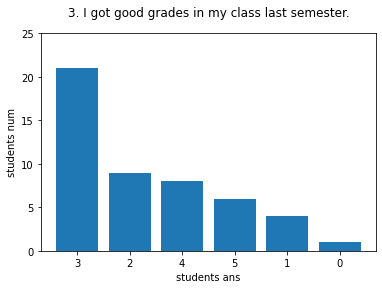

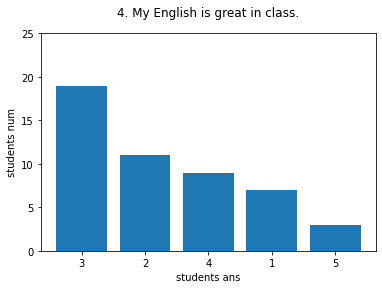

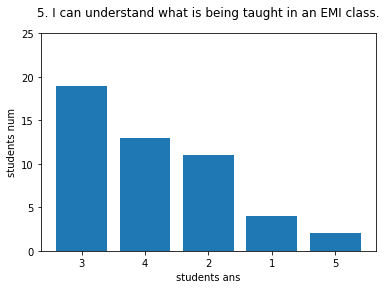

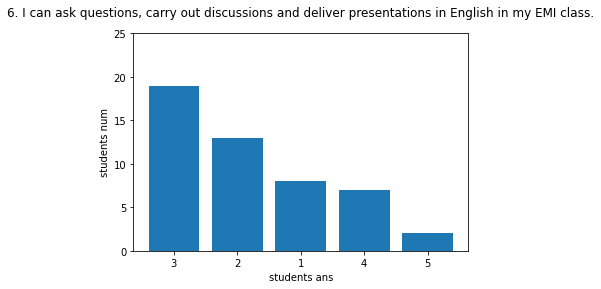

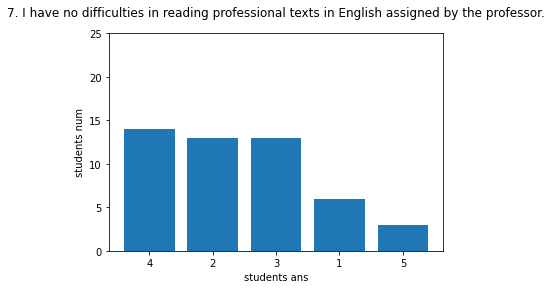

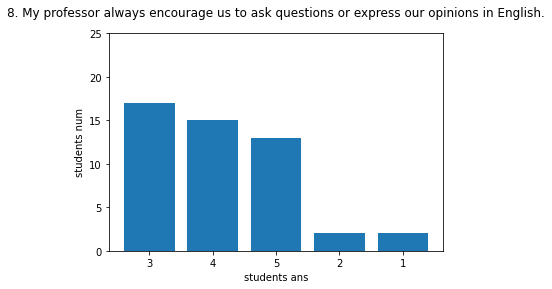

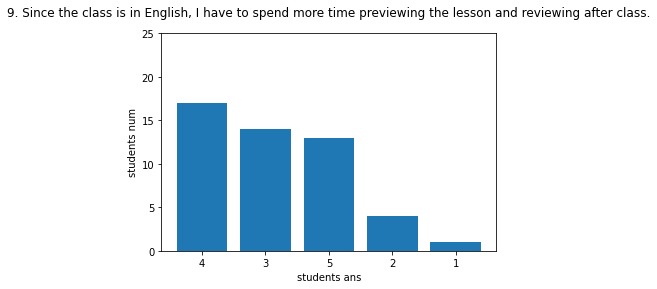

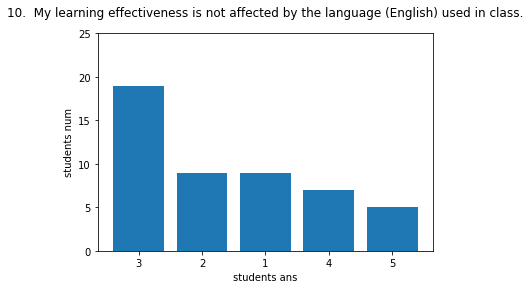

In [2]:
import matplotlib.pyplot as plt

# 設置圖表標題和軸標籤，並調整標題位置
for qst in final_df.columns[2:11]:
    ans = final_df[qst].value_counts()
    plt.bar(ans.index.astype(str), ans.values)
    plt.title(qst, y=1.05)
    plt.xlabel('students ans')
    plt.ylabel('students num')
    plt.yticks(range(0, 30, 5))

    # 顯示圖表
    plt.show()

('I need to improve my English.', ' Textbook content is too difficult.', ' Teaching pace is too fast.', 'Professional knowledge needs to be enhanced.', 'Textbook content is too difficult.', " I'm lack of time", ' I take responsibility for my life expense ', ' Teaching method is not clear and easy to understand.', ' Professional knowledge needs to be enhanced.', " Professor's english is hell of a catastrophe", 'Teaching pace is too fast.', 'anything is all fine.', 'Teaching method is not clear and easy to understand.') (32, 14, 16, 10, 4, 1, 1, 18, 17, 1, 1, 1, 1)


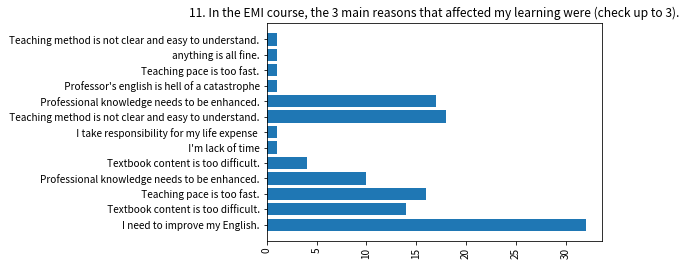

('Creating an English friendly environment.', 'I have learnt to use English to convey professional knowledge.', ' Develop my international perspective and apply English skills.', 'My English listening skill has improved.', ' Creating an English friendly environment.', ' I have learnt to use English to convey professional knowledge.', ' reading is better', ' My English speaking skill has improved.', ' Learn how to study by myself', 'Develop my international perspective and apply English skills.', 'My English speaking skill has improved.', 'nothing') (9, 4, 13, 29, 15, 15, 1, 7, 1, 3, 3, 1)


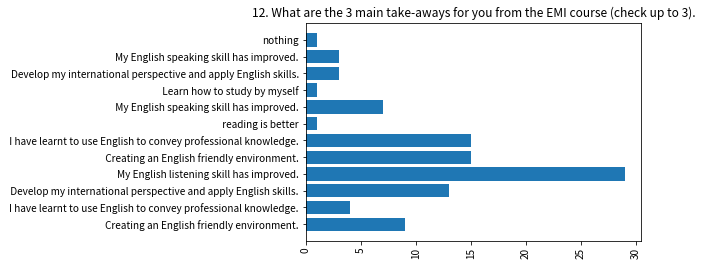

In [35]:
from collections import Counter
import itertools

# 針對開放式問題 11、12
for qst in final_df.columns[11:13]:
    feedback = [ans.split(',') for ans in final_df[qst] if ans]
    all_feed = list(itertools.chain(*feedback))
    counter = Counter(all_feed)
    
    labels, values = zip(*counter.items())
    plt.barh(labels, values)
    plt.xticks(rotation=90)
    plt.title(qst)
    plt.show()

In [4]:
from matplotlib.font_manager import findfont, FontProperties
findfont(FontProperties(family=FontProperties().get_family()))

'C:\\Users\\lutin\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'

In [5]:
from matplotlib import font_manager
font_set = {f.name for f in font_manager.fontManager.ttflist}
for f in font_set:
    print(f)

EmojiOne Color
STIXSizeFourSym
Playbill
HoloLens MDL2 Assets
Microsoft Sans Serif
Noto Mono
Vladimir Script
Caladea
Consolas
Algerian
Rockwell
Lucida Bright
Noto Sans Lao
STIXSizeTwoSym
Edwardian Script ITC
Snap ITC
Californian FB
Lucida Console
Wingdings 3
Microsoft Tai Le
Segoe UI Symbol
xiaowei
Eras Demi ITC
Forte
Big John
Ink Free
Informal Roman
Noto Sans Georgian
DejaVu Sans Display
OpenSymbol
Niagara Solid
Gadugi
Tahoma
Segoe UI
Ravie
STIXNonUnicode
Noto Sans Arabic
Calisto MT
Felix Titling
SimHei
DFKai-SB
Noto Serif Hebrew
Segoe Script
Juice ITC
Tempus Sans ITC
Niagara Engraved
MingLiU-ExtB
Liberation Sans Narrow
Impact
Poor Richard
Britannic Bold
Viner Hand ITC
Reem Kufi
Rage Italic
Malgun Gothic
Monotype Corsiva
Times New Roman
Parchment
Bookman Old Style
Gill Sans Ultra Bold
Segoe UI Variable
Symbol
Bodoni MT
cmmi10
Courier New
Noto Sans Arabic UI
Candara
Harrington
Microsoft Yi Baiti
Perpetua Titling MT
Book Antiqua
Segoe UI Historic
Noto Sans Hebrew
Verdana
Goudy Stout
STIX

No handles with labels found to put in legend.


{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.393, 'neu': 0.446, 'pos': 0.161, 'compound': -0.3818}
{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'compound': -0.7189}
{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.3412}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4199}
{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.096, 'neu': 0.904, 'pos': 0.0, 'compound': -0.1513}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


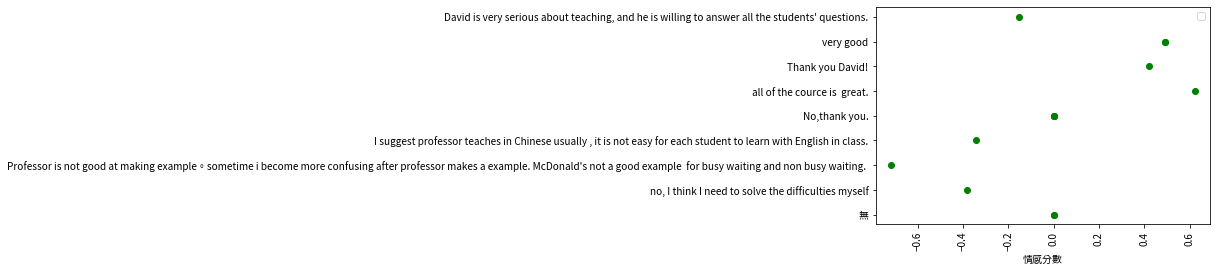

In [65]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

plt.rcParams['font.family'] = 'Noto Sans TC'

#nltk.download('vader_lexicon')

# 加载情感分析器
sia = SentimentIntensityAnalyzer()

compound_lst = []
feed_lst = []
for feed in final_df['13. Further feedback or suggestions.']:
    # 針對錯字和詞彙的使用作前處理
    if feed == 'vg':
        feed = 'very good'
    elif feed == 'No,think you.':
        feed = 'No,thank you.'
    elif feed == 'no':
        feed = 'No,thank you.'
    if feed:
        score = sia.polarity_scores(feed)
        print(score)
        compound_lst.append(score['compound'])
        feed_lst.append(feed)

plt.scatter(compound_lst, feed_lst, color='green')
plt.xticks(rotation=90)
plt.xlabel('情感分數')
plt.legend()
plt.show()

11. In the EMI course, the 3 main reasons that affected my learning were (check up to 3).


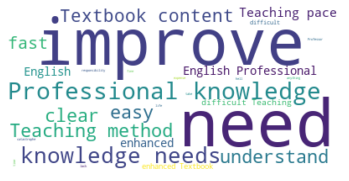

12. What are the 3 main take-aways for you from the EMI course (check up to 3).


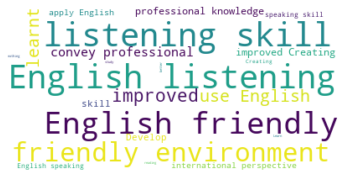

13. Further feedback or suggestions.


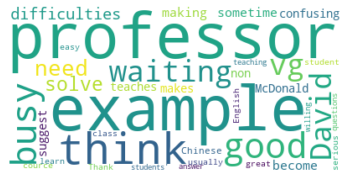

In [90]:
import nltk
from wordcloud import WordCloud
from PIL import Image

# 針對回饋做文字雲
for qst in final_df.columns[11:]:
    print(qst)
    feedback = [','.join(nltk.sent_tokenize(ans)) for ans in final_df[qst] if ans]
    text = ','.join(feedback)
    
    wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue').generate(text)
    # 繪圖
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()